In [1]:
import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

In [2]:
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree

In [3]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

In [4]:
### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

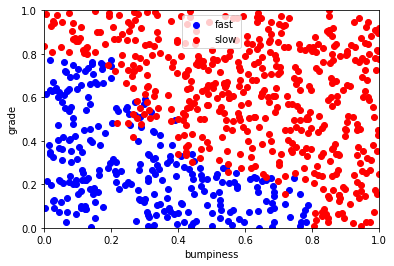

In [5]:
#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, p=1)

In [7]:
t0 = time()
clf.fit(features_train, labels_train)
print ("tempo de treinamento:", round(time()-t0, 3), "s")

tempo de treinamento: 0.052 s


In [8]:
t0 = time()
pred = clf.predict(features_test)
print ("tempo de predicao:", round(time()-t0, 3), "s")

tempo de predicao: 0.181 s


In [9]:
accuracy_score(labels_test, pred)

0.932

In [23]:
clf = AdaBoostClassifier(n_estimators=20, learning_rate=2.0)
t0 = time()
clf.fit(features_train, labels_train)
print ("tempo de treinamento:", round(time()-t0, 3), "s")

tempo de treinamento: 0.085 s


In [24]:
t0 = time()
pred = clf.predict(features_test)
print ("tempo de predicao:", round(time()-t0, 3), "s")

tempo de predicao: 0.011 s


In [25]:
accuracy_score(labels_test, pred)

0.936

D:\dev\Machine Learning\Lesson05_Choose_Your_Own\class_vis.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)


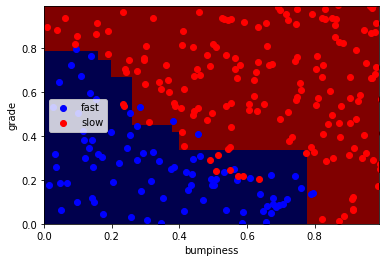

In [26]:
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass